In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
indir = Path('/home/hsher/scratch/circ_nextera/')
indir2 = Path('/home/hsher/scratch/circ_truseq/')
fastqc = pd.read_csv(indir/'QC/fastQC_passfail.r1.csv')
fastqc2 = pd.read_csv(indir2/'QC/fastQC_passfail.r1.csv')

pd.concat([fastqc, fastqc2], axis = 0)

,Unnamed: 0,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content,Adapter Content.1
0,fastQC/circseq-bm-rar11-nxt_1.Tr_fastqc/fastqc...,pass,pass,pass,pass,fail,pass,pass,warn,fail,warn,pass,pass
1,fastQC/circseq-bm-rar19-nxt_1.Tr_fastqc/fastqc...,pass,pass,pass,pass,fail,warn,pass,warn,fail,warn,pass,pass
0,fastQC/circseq-bm-arr_1.Tr_fastqc/fastqc_data.txt,pass,pass,pass,pass,warn,fail,pass,warn,fail,warn,pass,pass
1,fastQC/circseq-bm-rz_1.Tr_fastqc/fastqc_data.txt,pass,pass,pass,pass,fail,fail,pass,warn,fail,warn,pass,pass
2,fastQC/circseq-bm-rar_1.Tr_fastqc/fastqc_data.txt,pass,pass,pass,pass,fail,warn,pass,warn,fail,warn,pass,pass


In [2]:
cutadapt1 = pd.read_csv(indir/'QC/cutadapt_log.csv', index_col = 0)
cutadapt2 = pd.read_csv(indir2/'QC/cutadapt_log.csv', index_col = 0)
cutadapt = pd.concat([cutadapt1, cutadapt2], axis = 0)

Text(0, 0.5, '# Total read pairs sequenced')

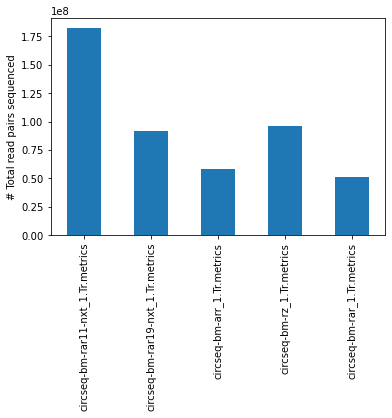

In [3]:
cutadapt['Total read pairs processed'].plot.bar()
plt.ylabel('# Total read pairs sequenced')

Text(0, 0.5, '% Pairs that were too short (likely primer dimer)')

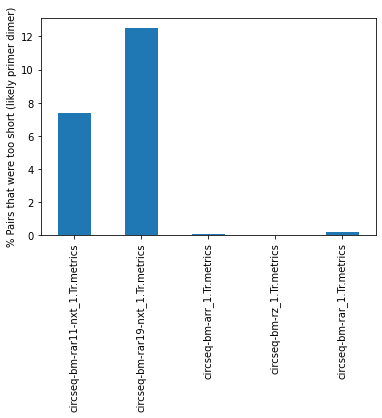

In [4]:
cutadapt['% Pairs that were too short'].plot.bar()
plt.ylabel('% Pairs that were too short (likely primer dimer)')

In [5]:
star_log1 = pd.read_csv(indir/'QC/genome_mapping_stats.csv')
star_log2 = pd.read_csv(indir2/'QC/genome_mapping_stats.csv')
star_log = pd.concat([star_log1, star_log2], axis = 0)
star_log.index = star_log['STAR Log filename'].apply(lambda x: x.split('/')[-1].replace('.Log.final.out',''))
star_log.sort_index(inplace = True)

In [6]:
star_log.index = star_log['STAR Log filename'].apply(lambda x: x.split('/')[-1].replace('.Log.final.out',''))
star_log.sort_index(inplace = True)

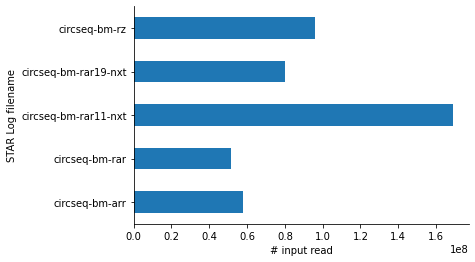

In [7]:
star_log['Number of input reads'].plot.barh()
plt.xlabel('# input read')
sns.despine()

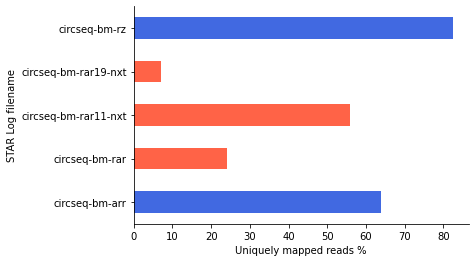

In [8]:
star_log['Uniquely mapped reads %'].plot.barh(color = ['tomato' if 'rar' in index else 'royalblue' for index in star_log.index])
plt.xlabel('Uniquely mapped reads %')
sns.despine()

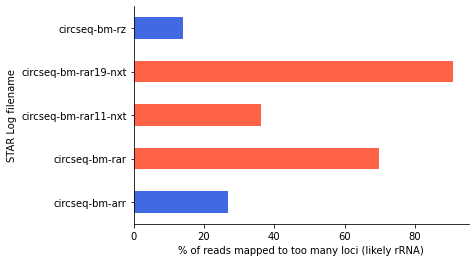

In [9]:
star_log['% of reads mapped to too many loci'].plot.barh(color = ['tomato' if 'rar' in index else 'royalblue' for index in star_log.index])
plt.xlabel('% of reads mapped to too many loci (likely rRNA)')
sns.despine()

In [10]:
star_log[['% of reads mapped to multiple loci', '% of reads mapped to too many loci',
                '% of reads unmapped: too many mismatches',
                 '% of reads unmapped: too short',
          '% of reads unmapped: other',
          'Uniquely mapped reads %',
          
                ]]

,% of reads mapped to multiple loci,% of reads mapped to too many loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,Uniquely mapped reads %
STAR Log filename,,,,,,
circseq-bm-arr,0.0,26.70,0.0,9.30,0.12,63.89
circseq-bm-rar,0.0,69.79,0.0,6.11,0.06,24.04
circseq-bm-rar11-nxt,0.0,36.13,0.0,7.87,0.09,55.91
circseq-bm-rar19-nxt,0.0,90.72,0.0,2.26,0.03,6.99
circseq-bm-rz,0.0,14.01,0.0,3.58,0.05,82.36


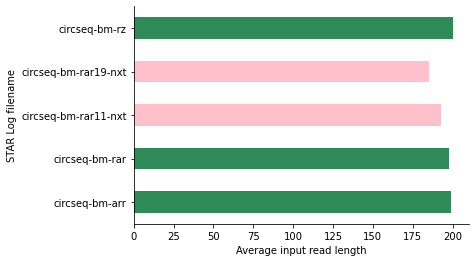

In [11]:
star_log['Average input read length']

star_log['Average input read length'].plot.barh(color = ['pink' if 'nxt' in index else 'seagreen' for index in star_log.index])
plt.xlabel('Average input read length')
sns.despine()